<a href="https://colab.research.google.com/github/burakerdal66/Makine_Ogrenmesi_Projeleri/blob/main/AltinFiyatTahmini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projed Kullanılan Veri seti: [ Buraya Tıkla](https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Proje aşaması:

Altın Değeri Veri seti  ->  Veri Ön İşleme -> Veri Analizi -> Verilerin Eğitim ve Test verilerine çevrilmesi -> Modelin (  Burada Random Forest Kullanılacaktır) Eğitilmesi -> Değerlendirme Aşaması

In [ ]:
# Bağımlılıkların içe aktarılması
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

**Veri Toplama Ve Ön işleme AŞAMALARI**

In [ ]:
altin_verileri=pd.read_csv("/content/drive/MyDrive/datasetler/gld_price_data.csv")

In [ ]:
# İlk 5 veriyi yazdırma.
altin_verileri.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# Veri setindeki son 5 satırı yazdırma
altin_verileri.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
#Toplam kaç veri olduğuna bakma
altin_verileri.shape

(2290, 6)

In [ ]:
# Veri setinden bazı temel bilgileri alalım
altin_verileri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# Kayıp değerlerin kontrol edilmesi
altin_verileri.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# Verideki istatiksel ölçümlere ulaşma
altin_verileri.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Korelasyon Matrisi:
1. Pozitif Korelasyon

2. Negatif Korelasyon

In [ ]:
korelasyon= altin_verileri.corr()

ValueError: could not convert string to float: '1/2/2008'

In [1]:
# Korelasyonu anlamak için bir ısı haritası oluşturmak
plt.figure(figsize = (8,8))
sns.heatmap(korelasyon, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

NameError: name 'plt' is not defined

In [ ]:
# correlation values of GLD
print(korelasyon['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


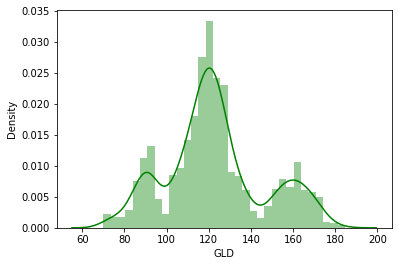

In [ ]:
# checking the distribution of the GLD Price
sns.distplot(altin_verileri['GLD'],color='green')

In [ ]:
X = altin_verileri.drop(['Date','GLD'],axis=1)
Y = altin_verileri['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
# Modelin Eğitimi
regressor.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# Dest verilerinin tahminlenmesi
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.32699968  81.94819986 115.70480041 127.41010064 120.90700068
 154.71489803 150.13359876 126.05480078 117.49259876 126.10170025
 116.68400094 171.42870056 141.30849872 168.02159836 115.23710006
 117.65880054 139.99590286 170.14650043 159.36550329 157.7788999
 155.08109978 125.5072004  175.80919981 157.22360324 125.23650052
  93.63189949  77.31300031 120.41329992 119.09699944 167.33849992
  87.85020039 125.33850039  91.04200093 117.60520038 121.21729884
 135.91539997 115.60030137 114.8546008  148.90609944 107.45720142
 104.09990231  87.17429793 126.55180059 118.02069986 153.00689898
 119.57450031 108.43489959 108.02569767  93.06320016 127.09119795
  75.14140033 113.55509908 121.47900041 111.35069881 118.91619888
 120.27279924 160.31060037 168.51620089 147.06449674  85.59369876
  94.32620022  86.79829933  90.3237999  119.05030078 126.43060051
 127.49300013 170.54360079 122.24279927 117.62959844  98.55510053
 168.06860158 142.99819816 132.09980232 121.19800249 120.89549925
 119.647900

In [ ]:
Y_test = list(Y_test)